# **Cvičení 2: Trajektorie projektilu**

---

V tomto cvičení se budeme zabývat analýzou pohybu projektilu ve 3D prostoru. Projdeme si základní principy popisu pohybu, vztahy mezi polohou, rychlostí a zrychlením a nakonec dynamiku pohybu pod vlivem gravitace, odporové síly a větru.

---


### Okamžitá poloha a okamžitá rychlost

Předpokládáme, že projektil se pohybuje v trojrozměrném prostoru popsaném kartézskými souřadnicemi $(x, y, z)$ a jeho poloha $$\vec{r}(t) = (x(t), y(t), z(t))$$ závisí na čase $t$.

![Schéma popisu pohybu ve 3D](images/pohyb.png)

Okamžitá rychlost projektilu je definována jako časová derivace jeho polohy:
$$
\vec{v}(t) = \frac{d\vec{r}(t)}{dt}.
$$
Tedy 
$$
\vec{v}(t) = \left( \frac{dx(t)}{dt},\frac{dy(t)}{dt},\frac{dz(t)}{dt} \right).
$$
Abychom uspořili místo, budeme značit derivace (společně s Newtonem) jako $\frac{dx(t)}{dt}=x'(t)$, $\frac{dy(t)}{dt}=y'(t)$ a $\frac{dz(t)}{dt}=z'(t)$, tedy
$$
\vec{v}(t) = \left( x'(t), y'(t), z'(t) \right).
$$


### Trajektorie z rychlosti

Známe-li průběh rychlosti $\vec{v}(t)$ v čase a počáteční polohu $\vec{r}_0 = (x_0, y_0, z_0)$, můžeme polohu $\vec{r}(t)$ vypočítat jako integrál rychlosti v čase:

$$
\vec{r}(t) = \vec{r}_0 + \int_{0}^{t} \vec{v}(\tau) \, d\tau.
$$

Složky polohy v jednotlivých osách rozepíšeme jako:

$$
\begin{aligned}
    x(t) &= x_0 + \int_{0}^{t} x'(\tau) \, d\tau, \\
    y(t) &= y_0 + \int_{0}^{t} y'(\tau) \, d\tau, \\
    z(t) &= z_0 + \int_{0}^{t} z'(\tau) \, d\tau.
\end{aligned}
$$


### Zrychlení jako derivace rychlosti

Zrychlení je definováno jako časová derivace rychlosti:
$$
\vec{a}(t) = \frac{d\vec{v}(t)}{dt}.
$$
Což také znamená, že zrychlení je druhou časovou derivací polohy:
$$
\vec{a}(t) = \frac{d^2\vec{r}(t)}{dt^2} = \left( x''(t), y''(t), z''(t) \right).
$$
Naším cílem pro tuto chvíli je vypočítat trajektorii projektilu za předpokladu, že známe funkci zrychlení $\vec{a}(t)$, počáteční rychlost $\vec{v}_0 = (x'_0, y'_0, z'_0)$ a počáteční polohu $\vec{r}_0 = (x_0, y_0, z_0)$.

Odkud dostaneme funkci $\vec{a}(t)$? Z Newtonova zákona síly! Uvidíme a použijeme později.

### Výpočet rychlosti ze zrychlení

V následujících úlohách budeme znát zrychlení $\vec{a}(t_{i-1})$ v čase $t_{i-1}$, stejně tak jako $\vec{v}(t_{i-1})$ a $\vec{r}(t_{i-1})$. Pro výpočet rychlosti a polohy v čase $t_{i}$ pak použijeme numerickou metodu, která aproximuje změnu rychlosti na základě hodnoty zrychlení v čase.

### Numerický výpočet trajektorie z rychlosti v čase

Pokud známe rychlosti v jednotlivých časových bodech $t_0, t_1, \dots, t_n$, tedy známe 
$$\vec{v}_i=\left( x'_i, y'_i, z'_i \right) \text{ pro } i=0,1,\ldots,n,$$ 
můžeme polohu $\vec{r}(t)$ vypočítat numericky. K tomuto využijeme definici integrálu jakožto plochy pod integrovanou křivkou. Jednoduchou představu o tom, co numerická integrace představuje, si můžeme udělat na následujícím obrázku (pro každou složku rychlosti zvlášť):

![Ilustrace lichobeznikoveho pravidla](images/lichobeznikove_pravidlo.png)

Pokud tedy máme časové body $t_0, t_1, \dots, t_n$ a pro jednoduchost uvažujeme stejný časový krok $\Delta t = t_{i} - t_{i-1}$, můžeme polohu přibližně spočítat pomocí [lichoběžníkového pravidla](https://en.wikipedia.org/wiki/Trapezoidal_rule):

$$
\begin{aligned}
    x_{i} &= x_{i-1} + \frac{x'_{i-1} + x'_{i}}{2} \cdot \Delta t, \\
    y_{i} &= y_{i-1} + \frac{y'_{i-1} + y'_{i}}{2} \cdot \Delta t, \\
    z_{i} &= z_{i-1} + \frac{z'_{i-1} + z'_{i}}{2} \cdot \Delta t.
\end{aligned}
$$

Samozřejmě to lze zapsat i vektorově (pro všechny souřadnice najednou):
$$
\vec{r}_{i} = \vec{r}_{i-1} + \frac{\vec{v}_{i-1} + \vec{v}_{i}}{2} \cdot \Delta t.
$$

Nyní si to ukážeme na příkladu.


In [1]:
# začneme s potřebnými importy
import numpy as np
import matplotlib.pyplot as plt

#### Vykreslení trajektorie

Pro vizualizaci trajektorií využijeme knihovnu `matplotlib`. Napíšeme si jednoduchou funkci pro vykreslení trajektorie.


In [2]:
def vykresli_trajektorii(t, r):
    """
    Vykreslí průběh souřadnic x, y, z v čase.

    Parametry:
    - t: seznam nebo pole časových bodů
    - r: 2D pole nebo seznam, kde každý řádek odpovídá [x, y, z] v čase
    """
    # Vytvoření grafů pro jednotlivé souřadnice
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 6))

    # x vs čas
    ax1.plot(t, r[:, 0])
    ax1.set_xlabel('Čas (t)')
    ax1.set_ylabel('x')
    ax1.set_title('Průběh x v čase')
    ax1.grid()

    # y vs čas
    ax2.plot(t, r[:, 1])
    ax2.set_xlabel('Čas (t)')
    ax2.set_ylabel('y')
    ax2.set_title('Průběh y v čase')
    ax2.grid()

    # z vs čas
    ax3.plot(t, r[:, 2])
    ax3.set_xlabel('Čas (t)')
    ax3.set_ylabel('z')
    ax3.set_title('Průběh z v čase')
    ax3.grid()

    # Uspořádání a zobrazení grafů
    plt.tight_layout()
    plt.show()

---

### Úkol 1.

Předpokládejme projektil, který je vystřelen z počátku souřadného systému:

$$\vec{r}_0 = (0, 0, 0).$$

a jeho počáteční rychlost je:

$$\vec{v}_0 = (1, 0, 0).$$

Pokud prozatím předpokládáme, že jeho rychlost zůstává konstantní:

$$\vec{v}_i = \vec{v}_0.$$

Uvažujte časový krok $\Delta t = 0.01$ a časový interval $t \in [0, 10]$. Spočítejte trajektorii projektilu v čase, znáte-li jeho rychlost v časových bodech:

$$t_i = i \cdot \Delta t \text{ pro } i=0,1,\ldots,1000.$$

- **Posloupnost rychlostí a pozic reprezentujte jako Numpy matice o velikosti $n\times3$.**
    - Díky tomu bude možné snadno pracovat s 3D vektory v čase pomocí jednoduché indexace.


In [ ]:
# Úkol 1

# Zadání
r_0 = [0, 0, 0]  # počáteční poloha
v_0 = [1, 0, 0]  # počáteční rychlost
dt = 0.01        # časový krok
start = 0        # počáteční čas
stop = 10        # konečný čas

# Vektor časových okamžiků
t = np.arange(start, stop, dt)
n = len(t)

# Známé hodnoty vektoru rychlosti
v = np.zeros((n, 3))  # inicializace matice rychlostí
v[:] = v_0         # všechny hodnoty nastavíme na počáteční rychlost

# Úkol 1: doplňte funkci pro výpočet polohy


def poloha(r_0, v, dt, n):
    """
    Výpočet polohy projektilu v čase.

    Parametry:
    - r_0: počáteční poloha (vektor)
    - v: matice rychlostí (n x 3)
    - dt: časový krok
    - n: počet časových kroků

    Návratová hodnota:
    - Matice poloh o velikosti n x 3
    """
    ###### doplňte kód zde ######
    # Inicializace matice poloh
    r = np.zeros((n, 3))

    # Nastavení počáteční polohy
    r[0] = r_0

    # Výpočet polohy v čase pomocí lichoběžníkového pravidla
    for i in range(1, n):
        r[i] = r[i - 1] + (v[i - 1] + v[i]) / 2 * dt
    #############################

    # Návrat matice poloh
    return r


# Výpočet polohy
r = poloha(r_0, v, dt, n)

# Vykreslení trajektorie
vykresli_trajektorii(t, r)

#### Co na grafech vidíme?

Jelikož se jedná o pohyb rovnoměrný přímočarý, trajektorie je ve všech třech dimenzích přímka. Sklon přímky v jednotlivých osách je určen konstantní rychlostí v daném směru.


---

#### Numerický výpočet rychlosti ze znalosti zrychlení – Eulerova metoda

Numerický výpočet rychlosti můžeme provést pomocí Eulerovy metody, která aproximuje změnu rychlosti na základě hodnoty zrychlení v čase. Jedná se v podstatě o aproximaci rychlosti pomocí její tečny v každém časovém kroku:

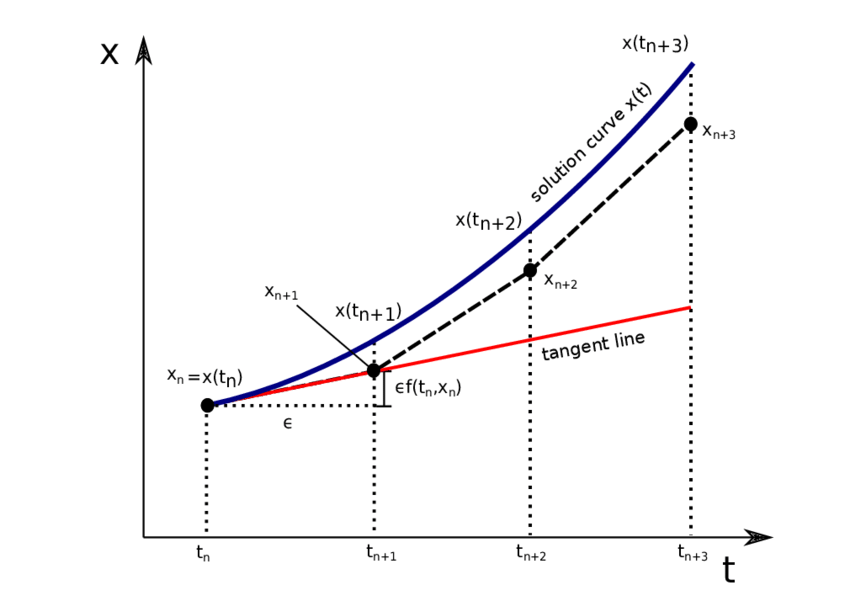

Vzorcem je to:
$$
\begin{aligned}
    x'_{i} &= x'_{i-1} + x''(t_{i-1}) \cdot \Delta t, \\
    y'_{i} &= y'_{i-1} + y''(t_{i-1}) \cdot \Delta t, \\
    z'_{i} &= z'_{i-1} + z''(t_{i-1}) \cdot \Delta t,
\end{aligned}
$$
kde $\Delta t = t_{i} - t_{i-1}$ je časový krok.

Opět můžeme všechny složky rychlosti spočítat vektorově:
$$
\vec{v}_{i} = \vec{v}_{i-1} + \vec{a}(t_{i-1}) \cdot \Delta t.
$$

Trajektorii můžeme vypočítat stejným způsobem jako v předchozím případě.


#### Tíhové zrychlení
Podle druhého Newtonova zákona je zrychlení projektilu dáno vztahem
$$
\vec{a}(t) = \frac{\vec{F}(t)}{m},
$$
kde $m$ je hmotnost v $\mathrm{kg}$ projektilu a $\vec{F}$ je působící vnější síla.

Pokud na projektil působí pouze konstantní tíhová síla $\vec{F}(t) = (0, 0, -m g)$, tak se projektil pohybuje se se zrychlením $\vec{a}(t) = (0, 0, -g)$, kde $g$ je velikost tíhového zrychlení ($g \approx 9.81 \, \mathrm{m/s^2}$), dostáváme:
$$
\begin{aligned}
    x'_{i} &= x'_{i-1}, \\
    y'_{i} &= y'_{i-1}, \\
    z'_{i} &= z'_{i-1} - g \cdot \Delta t.
\end{aligned}
$$

---

### Úkol 2.

Předpokládejme projektil, který je vystřelen z počátku souřadného systému:

$$\vec{r}_0 = (0, 0, 0).$$

a jeho počáteční rychlost je:

$$\vec{v}_0 = (30, 0, 30).$$

Předpokládejte, že na projektil působí pouze tíhová síla.

Uvažujte časový krok $\Delta t = 0.01$ a časový interval $t \in [0, 10]$. Spočítejte trajektorii projektilu v čase, znáte-li jeho zrychlení v časových bodech:

$$t_i = i \cdot \Delta t \text{ pro } i=0,1,\ldots,1000.$$

- **Využijte Eulerovu metodu pro numerický výpočet rychlosti a kód z předchozího příkladu pro výpočet trajektorie.**
- **U funkce zrychlení uvažujte, že závisí na rychlosti a na čase.** Toto nám umožní použít stejnou funkci i na další úlohy, kde bude zrychlení záviset na rychlosti.


In [ ]:
# UKOL 2

# Počáteční podmínky a parametry
r0 = np.array([0, 0, 0])  # počáteční poloha
v0 = np.array([30, 0, 30])  # počáteční rychlost
dt = 0.01  # časový krok
start = 0  # počáteční čas
stop = 10  # konečný čas

t = np.arange(start, stop, dt)  # vektor časových okamžiků


def a_gravitace(v_i, t_i):
    """
    Funkce vrací konstantní tíhové zrychlení.

    Parametry:
    - v_i: aktuální rychlost (nevyužívá se, zahrnuto pro obecnost)
    - t_i: aktuální čas (nevyužívá se, zahrnuto pro obecnost)

    Návratová hodnota:
    - Numpy pole reprezentující zrychlení [0, 0, -g].
    """
    g = 9.81
    return np.array([0, 0, -g])


def euler_rychlost(v0, a_funkce, t, dt):
    """
    Výpočet rychlostí a zrychlení pomocí Eulerovy metody.

    Parametry:
    - v0: počáteční rychlost jako 1D Numpy pole [vx, vy, vz]
    - a_funkce: funkce vracející zrychlení v závislosti na rychlosti a čase
    - t: Numpy pole časových okamžiků
    - dt: časový krok (velikost změny času mezi okamžiky)

    Návratová hodnota:
    - a: Numpy matice (n x 3) všech zrychlení v jednotlivých časových okamžicích
    - v: Numpy matice (n x 3) všech rychlostí v jednotlivých časových okamžicích
    """
    ###### doplňte kód zde ######
    n = len(t)
    a = np.zeros((n, 3))  # inicializace matice zrychlení
    v = np.zeros((n, 3))  # inicializace matice rychlostí
    v[0] = v0  # nastavení počáteční rychlosti
    for i in range(1, n):
        a[i - 1] = a_funkce(v[i - 1], t[i - 1])  # výpočet zrychlení
        v[i] = v[i - 1] + a[i - 1] * dt  # výpočet rychlosti
    #############################

    return a, v


# Výpočet zrychlení a rychlosti pomocí Eulerovy metody
a, v = euler_rychlost(v0, a_gravitace, t, dt)

# Výpočet trajektorie projektilu
r = poloha(r0, v, dt, len(t))

# Vykreslení trajektorie
vykresli_trajektorii(t, r)

---
### Odpor vzduchu

Při reálném pohybu projektilu nelze zanedbat odpor prostředí, kterým se projektil pohybuje. Uvažujme, že odpor vzduchu působí proti směru pohybu projektilu, je úměrný kvadrátu jeho rychlosti a působí proti směru pohybu. Model [odporu vzduchu](https://en.wikipedia.org/wiki/Drag_equation) lze zapsat jako:

$$
\vec{F}(t) = - \alpha \cdot \|\vec{v}(t)\| \cdot \vec{v}(t),
$$

kde:
- $\alpha$ v $\mathrm{kg/m}$ je koeficient odporu (závisí na tvaru projektilu, hustotě vzduchu a průřezu projektilu),
- $\vec{v}(t)$ je vektor rychlosti projektilu,
- $\|\vec{v}(t)\|$ je velikost rychlosti projektilu.

### Zrychlení s odporem vzduchu

Z druhého Newtonova zákona víme, že zrychlení projektilu dáno vztahem
$$
\vec{a}(t) = \frac{\vec{F}(t)}{m},
$$
kde $m$ je hmotnost projektilu a $\vec{F}$ je působící síla, která je součet tíhové a odporové síly působící na projektil. Výsledné zrychlení projektilu tedy je:

$$
\vec{a}(t) = (0, 0, -g) - \frac{\alpha}{m} \cdot \|\vec{v}(t)\| \cdot \vec{v}(t).
$$

Tedy:
- zrychlení umíme spočítat v každém časovém okamžiku, známe-li rychlost projektilu,
- rychlost projektilu umíme spočítat v každém časovém okamžiku, známe-li zrychlení projektilu v předchozím časovém okamžiku **(Eulerova metoda z minulého úkolu)**,
- trajektorii projektilu umíme spočítat v každém časovém okamžiku, známe-li rychlost projektilu v jednotlivých časových okamžicích **(lichoběžníkové pravidlo z prvního úkolu)**.


---

### Úkol 3.

Předpokládejme projektil o hmotnosti $m = 0.001$ $\mathrm{kg}$, který je vystřelen z počátku souřadného systému:

$$
\vec{r}_0 = (0, 0, 0).
$$

a jeho počáteční rychlost je:

$$
\vec{v}_0 = (30, 0, 30).
$$

Předpokládejte, že na projektil působí odporová síla (v prostředí s koeficientem $\alpha = 2 \times 10^{-5}\, \mathrm{kg/m}$) a tíhová síla.

Uvažujte časový krok $\Delta t = 0.01$ a časový interval $t \in [0, 10]$. Spočítejte trajektorii projektilu v čase, znáte-li jeho zrychlení v časových bodech:

$$
t_i = i \cdot \Delta t \text{ pro } i=0,1,\ldots,1000.
$$

- **Využijte Eulerovu metodu z předchozího příkladu pro výpočet rychlosti a kód z prvního příkladu pro výpočet trajektorie.**


In [ ]:
# UKOL 3

# Počáteční podmínky a parametry
r0 = np.array([0, 0, 0])  # počáteční poloha
v0 = np.array([30, 0, 30])  # počáteční rychlost
dt = 0.01  # časový krok
start = 0  # počáteční čas
stop = 10  # konečný čas
alpha = 2e-5  # koeficient odporu
m = 0.001  # hmotnost projektilu

t = np.arange(start, stop, dt)  # vektor časových okamžiků


def a_gravitace_odpor(v_i, t_i):
    """
    Výpočet zrychlení působící na projektil vlivem tíhy a odporu prostředí.

    Parametry:
    - v_i: aktuální rychlost projektilu jako 1D Numpy pole [vx, vy, vz]
    - t_i: aktuální čas (nevyužívá se, zahrnuto pro konzistenci)

    Návratová hodnota:
    - a: 1D Numpy pole [ax, ay, az] reprezentující zrychlení působící na projektil
    """
    ###### doplňte kód zde ######
    v_norm = np.linalg.norm(v_i)  # velikost rychlosti
    F = -alpha * v_norm * v_i  # odporová síla
    a_g = np.array([0, 0, -9.81])  # tíhové zrychlení
    a = F / m + a_g  # celkové zrychlení
    #############################

    return a


# Výpočet zrychlení a rychlosti pomocí Eulerovy metody
a, v = euler_rychlost(v0, a_gravitace_odpor, t, dt)

# Výpočet trajektorie projektilu
r = poloha(r0, v, dt, len(t))

# Vykreslení trajektorie
vykresli_trajektorii(t, r)

In [ ]:
# díky tomu, že máme vykreslovací funkci pěkně univerzálně napsanou,
# můžeme jí použít i pro zobrazení rychlosti v čase
vykresli_trajektorii(t, v)

### A co když fouká vítr?

V reálných podmínkách je projektil často ovlivněn nejen gravitací a odporem vzduchu, ale také větrem. Vítr přidává další složku rychlosti prostředí, která ovlivňuje pohyb projektilu. Uvažujme vítr s konstantní rychlostí:
$$
\vec{w} = (w_x, w_y, w_z),
$$
kde jednotlivé složky reprezentují rychlost větru ve směrech os $x$, $y$ a $z$.

### Modifikace odporu vzduchu s větrem

Započítání vlivu větru naštěstí nepřidá další komplikaci pro náš výpočet, protože odporová síla není ve skutečnosti úměrná kvadrátu rychlosti projektilu, ale rozdílu rychlosti projektilu a okolního prostředí. Tedy, síla odporu vzduchu se odvíjí od relativní rychlosti projektilu vůči okolnímu prostředí. 

Odporová síla v prostředí s větrem je definována jako:
$$
\vec{F} = - \alpha \cdot \|\vec{v} - \vec{w}\| \cdot (\vec{v} - \vec{w}),
$$
kde:
- $\vec{F}$ je odporová síla,
- $\alpha$ je koeficient odporu,
- $\vec{v}$ je rychlost projektilu,
- $\vec{w}$ je rychlost větru.

### Celkový výpočet

Výpočet zrychlení projektilu zůstává stejný jako v předchozím případě, jediný rozdíl bude ve funkci počítající aktuální zrychlení, která nyní zohlední relativní rychlost projektilu vůči prostředí.


---

### Úkol 4.

Předpokládejme projektil o hmotnosti $m = 0.001\, \mathrm{kg}$, který je vystřelen z počátku souřadného systému:

$$
\vec{r}_0 = (0, 0, 0).
$$

a jeho počáteční rychlost je:

$$
\vec{v}_0 = (30, 0, 30).
$$

Předpokládejte, že na projektil působí odporová síla (v prostředí s koeficientem $\alpha = 2 \times 10^{-5}\, \mathrm{kg/m}$), tíhová síla a vítr o rychlosti:

$$
\vec{w} = (-5, 3, 0).
$$

Uvažujte časový krok $\Delta t = 0.01$ a časový interval $t \in [0, 10]$. Spočítejte trajektorii projektilu v čase, znáte-li jeho zrychlení v časových bodech:

$$
t_i = i \cdot \Delta t \text{ pro } i=0,1,\ldots,1000.
$$

- **Využijte Eulerovu metodu z předchozího příkladu pro výpočet rychlosti a kód z prvního příkladu pro výpočet trajektorie.**


In [ ]:
# UKOL 4

# Počáteční podmínky a parametry
r0 = np.array([0, 0, 0])  # počáteční poloha
v0 = np.array([30, 0, 30])  # počáteční rychlost
w = np.array([-5, 3, 0])  # rychlost větru
dt = 0.01  # časový krok
start = 0  # počáteční čas
stop = 10  # konečný čas
alpha = 2e-5  # koeficient odporu
m = 0.001  # hmotnost projektilu

t = np.arange(start, stop, dt)  # vektor časových okamžiků


def a_gravitace_odpor_vítr(v_i, t_i):
    """
    Výpočet zrychlení působící na projektil vlivem tíhy, odporu prostředí a větru.

    Parametry:
    - v_i: aktuální rychlost projektilu jako 1D Numpy pole [vx, vy, vz]
    - t_i: aktuální čas (nevyužívá se, zahrnuto pro konzistenci)

    Návratová hodnota:
    - a: 1D Numpy pole [ax, ay, az] reprezentující zrychlení působící na projektil
    """
    ###### doplňte kód zde ######
    v_rel = v_i - w  # relativní rychlost vůči větru
    v_norm = np.linalg.norm(v_rel)  # velikost relativní rychlosti
    F = -alpha * v_norm * v_rel  # odporová síla
    a_g = np.array([0, 0, -9.81])  # tíhové zrychlení
    a = F / m + a_g  # celkové zrychlení
    #############################

    return a


# Výpočet zrychlení a rychlosti pomocí Eulerovy metody
a, v = euler_rychlost(v0, a_gravitace_odpor_vítr, t, dt)

# Výpočet trajektorie projektilu
r = poloha(r0, v, dt, len(t))

# Vykreslení trajektorie
vykresli_trajektorii(t, r)

In [ ]:
vykresli_trajektorii(t, v)

</br>
</br>
</br>
</br>
</br>
</br>

---
---
---
---
# Bonusové materiály:
---


## B1: Střelba na terč

Uvažujme střelbu na terč vzdálený 50 m ze vzduchovky.

- Diabolka běžně váží $m = 0.51 \times 10^{-3}\, \mathrm{kg}$.
- Střelec může být umístěn do počátku souřadného systému, tedy $\vec{r}_0 = (0, 0, 0)$.
- Terč vzdálený 50 m je v bodě $(50, 0, 0)$.
- Úsťová rychlost diabolky je $\rho = 200 \, \mathrm{m/s}$.
- Koeficient odporu pro diabolku je $\alpha = 1.7 \times 10^{-5}\, \mathrm{kg/m}$.
- Tíhové zrychlení je $g = 9.81\, \mathrm{m/s^2}$.
- Rychlost větru je $\vec{w} = (-5, 3, 0)\, \mathrm{m/s}$.

Střelec se snaží zasáhnout terč, a proto kompenzuje vliv větru a gravitace tak, že míří o 2 stupně výše a 1.7 stupně doleva od terče. Spočítejte trajektorii diabolky. 

### Poznámky:
- Úhly je třeba převést na radiány pomocí funkce `np.deg2rad()` a rozmyslet si, jak převést úhly na jednotlivé souřadnice rychlosti.
- Vzorce pro výpočty úhlů:
  - $\varphi = \frac{\pi}{2} - $`np.deg2rad`$(2)$
  - $\theta = $`np.deg2rad`$(-1.7)$


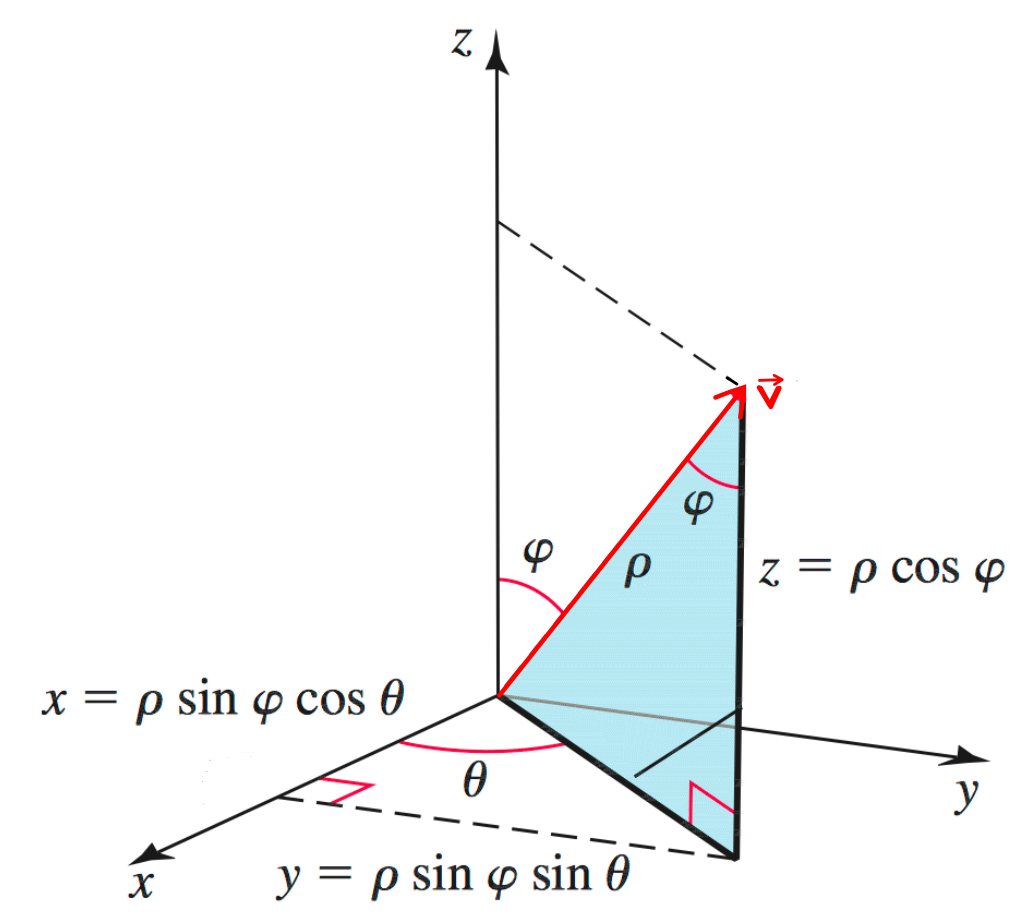


**Vzhledem ke vzdálenosti terče a rychlosti diabolky nám stačí uvažovat pouze 1 sekundu pohybu diabolky.**

In [ ]:
# UKOL B1

# Počáteční podmínky a parametry
r0 = np.array([0, 0, 0])  # počáteční poloha
ustova_rychlost = 200  # úsťová rychlost
uhel_naklonu_z = 2  # naklonění směrem nahoru
uhel_naklonu_y = -1.7  # naklonění doleva

w = np.array([-5, 3, 0])  # rychlost větru
dt = 0.01  # časový krok
start = 0  # počáteční čas
stop = 1  # konečný čas
alpha = 1.7e-5  # koeficient odporu
m = 0.00051  # hmotnost diabolky

t = np.arange(start, stop, dt)  # vektor časových okamžiků

###### doplňte kód zde ######
# Výpočet vektoru počáteční rychlosti
# Převod na radiány
uhel_naklonu_z = np.pi / 2 - np.deg2rad(uhel_naklonu_z)
uhel_naklonu_y = np.deg2rad(uhel_naklonu_y)

# Výpočet jednotlivých složek rychlosti pomocí sférických souřadnic
v0 = ustova_rychlost * np.array([
    np.cos(uhel_naklonu_y) * np.sin(uhel_naklonu_z),  # složka ve směru osy x
    np.sin(uhel_naklonu_y) * np.sin(uhel_naklonu_z),  # složka ve směru osy y
    np.cos(uhel_naklonu_z)  # složka ve směru osy z
])
#############################

# Výpočet zrychlení a rychlosti pomocí Eulerovy metody
a, v = euler_rychlost(v0, a_gravitace_odpor_vítr, t, dt)

# Výpočet trajektorie projektilu
r = poloha(r0, v, dt, len(t))

# Vykreslení trajektorie
vykresli_trajektorii(t, r)

---
## B2: Střelba na terč - zásah

Kde jsme zasáhli terč?

Uvažujme, že terč je celá rovina se souřadnicí $x = 50$.


In [ ]:
def zasah_terce(r, vzdalenost_terce):
    """
    Určí místo zásahu na terči.

    Parametry:
    - r: Numpy matice trajektorie projektilu, kde každý řádek obsahuje [x, y, z]
    - vzdalenost_terce: vzdálenost terče ve směru osy x

    Návratová hodnota:
    - z, y: souřadnice zásahu na terči
    """
    ###### doplňte kód zde ######
    # Najdeme první bod trajektorie za terčem
    i = np.argmax(r[:, 0] > vzdalenost_terce)
    # Najdeme poslední bod trajektorie před terčem
    j = i - 1
    # Interpolace pro souřadnice y a z
    y = r[j, 1] + (r[i, 1] - r[j, 1]) / (r[i, 0] - r[j, 0]) * (vzdalenost_terce - r[j, 0])
    z = r[j, 2] + (r[i, 2] - r[j, 2]) / (r[i, 0] - r[j, 0]) * (vzdalenost_terce - r[j, 0])
    #############################
    return z, y


# Parametr vzdálenosti terče
vzdalenost_terce = 50

# Výpočet místa zásahu
z, y = zasah_terce(r, vzdalenost_terce)

# Výstup výsledků
print(f"Trajektorie protne terč na souřadnicích y = {y:.2f}, z = {z:.2f}")